Resolvendo um problema de regressão linear: Tarefa 2 da disciplina Reconhecimento de Padrões. 

Professor: Francisco de Assis Boldt 

Aluno: Diogo de Santana Candido

In [55]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())



Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.10


Item 1: Carregue uma base de dados de regressão que NÃO esteja nos toy datasets do scikit-learn;

Foi escolhido o Datasets "3D Road Network (North Jutland, Dinamarca)" da UCI Marchine Learning Repository que disponibiliza uma nuvem de pontos com os dados correspondentes ao id (identificador único), Longitude, Latitude e Altitude de cada ponto. Os seus metadados podem ser obtidos em https://archive.ics.uci.edu/ml/datasets/3D+Road+Network+%28North+Jutland%2C+Denmark%29#

Este trabalho tem por objetivo construir uma regressão linear que com os dados de id, longitude e latitude consiga prever os dados de altitude de um ponto.  

In [56]:
import pandas as pd

url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/00246/3D_spatial_network.txt")
df = pd.read_csv(url)

X, y = df.iloc[:, :3], df.iloc[:, -1] 


Item 2: Treine um modelo da classe LinearRegression do scikit-learn com toda a base;

In [57]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(X, y)
ypred =  modelo.predict(X)
intercept_ypred = modelo.intercept_
coef_ypred = modelo.coef_
print("Valor do Intercept: ", intercept_ypred)
print("Valor dos coeficientes da Regressão Linear: ", coef_ypred)


Valor do Intercept:  656.130263320995
Valor dos coeficientes da Regressão Linear:  [ 5.04835447e-08  4.49231173e+00 -1.19579390e+01]


Item 3: Calcule o MSE (erro quadrático médio) para todos os exemplos da base usada como treino no modelo treinado (resubstituição);

In [58]:
from sklearn.metrics import mean_squared_error

mse_ypred = mean_squared_error(y, ypred)
print("Valor MSE: ", mse_ypred)


Valor MSE:  333.8372979075865


Item 4: Plote em um gráfico (2D) o MSE em função do atributo intercept_ da classe LinearRegression. Mantenha os valores do atributo coef_ fixos e varie o valor de intercept_ entre intercept_ - delta e intercept_ + delta. O gráfico tem que ser uma parábola com concavidade para cima. Não plote um gráfico 3D com visão de cima.

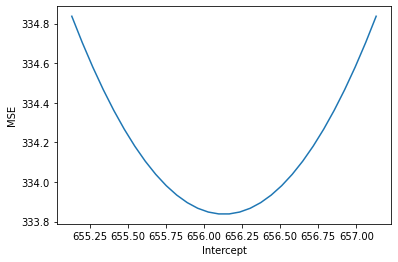

In [59]:
import numpy as np
import matplotlib.pyplot as plt

delta = 1
iteracoes = 30
intercept_range = np.linspace(intercept_ypred - delta, intercept_ypred + delta , iteracoes)

mse = []

for i in range(iteracoes):
    modelo.intercept_ = intercept_range[i]
    ypred =  modelo.predict(X)
    mse.append(mean_squared_error(y, ypred))

plt.ylabel("MSE")
plt.xlabel("Intercept")
plt.plot(intercept_range, mse)
plt.show()
